# Unit 12 Lecture 2 - Regression Analysis

ESI4628: Decision Support Systems for Industrial Engineers<br>
University of Central Florida
Dr. Ivan Garibay, Ramya Akula, Mostafa Saeidi, Madeline Schiappa, and Brett Belcher. 
https://github.com/igaribay/DSSwithPython/blob/master/DSS-Week08/Notebook/DSS-Unit08-Lecture02.2018.ipynb

## Notebook Learning Objectives
After studying this notebook students should be able to:
- objective 1

# Overview

<p style="font-size: 18px"><b>Evaluating the Model</b></p>
<p style="font-size: 16px"><b>R-Squared</b>
<p style="font-size: 16px">Now that we have a fit model, it is time to interpret how accurate the model represents the data. The main method for measuring accuracy of the model is through the R-squared value. The R-squared value measures the closeness of the data to the fitted regression line and is the percentage of variance of the response variable that is explained by the linear model. The value is calculated by calculating the total variance and the unexplained variance. The formulas to accomplish this are below:</p>

<p style="font-size: 16px"><i>Total Sum of Squares</i>, or the total variation in the response variable: $SS_{tot} = \sum_i(y_i - \bar{y})^2$
<p style="font-size: 16px"><i>Explained Sum of Squares</i>, or how much of the response variable was exaplained by our model: $SS_{reg} = \sum_i(\hat{y} - \bar{y})^2$
<p style="font-size: 16px"><i>Residual Sum of Squares</i>, or how much of the response variable was not explained by our model: $SS_{res} = \sum_i(y_i - \hat{y})^2$
<p style="font-size: 16px"><i>R-squared or Coefficient of determination:</i> $\displaystyle R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$


<p style="font-size: 16px">Where $\displaystyle \hat{y}$ is the predicted value by our model.<br><br>
By looking at the R-squared equation, it can be more easily seen that its inverse represents a fraction of the total variance that is unexaplained.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

%matplotlib inline 

ice = pd.read_csv('../Data/SeaIce.txt', delim_whitespace=True)
ice_cleaned = ice[ice['data_type'] != '-9999']
grouped = ice_cleaned.groupby('mo')  # group by first so do not have to run multiple group by computations
month_means = grouped.extent.mean()
month_mean = month_means.mean()
ice_cleaned = ice_cleaned.assign(n_extent = grouped.extent.apply(lambda x: 100*((x-x.mean())/month_mean)))
ice_cleaned = ice_cleaned.assign(n_area = grouped.area.apply(lambda x: 100*((x-x.mean())/month_mean)))

X = ice_cleaned[['year']]
y = ice_cleaned[['n_extent']]

# Create linear regression object
model = linear_model.LinearRegression()

# Train the model using the training sets
model.fit(X, y)

# Make predictions using the testing set
y_pred = model.predict(X)

print("R-Squared : {}".format(r2_score(y, y_pred)))

R-Squared : 0.669696838689


<p style="font-size: 16px"><b>Mean Squared Error</b>
<p style="font-size: 16px">Another metric that is commonly used is the Mean Squared Error:</p>
$$MSE = \frac{1}{n}\sum_{i=1}^{n}(Y_i - \hat{Y_i})^2$$

<br><p style="font-size: 16px">This metric measures the average squared difference between the predicted value and the actual value. The closer to 0 the better!</p>

In [10]:
print("Mean Squared Error: {}".format(mean_squared_error(y, y_pred)))

Mean Squared Error: 10.5391316398


<p style="font-size: 16px">Below is a summary of our result. The results indicate that approximately 50% of the variance in the response variable is explained by our model. Let's see if we can improve this with using another predictor variable or including several. 

In [11]:
pd.DataFrame(data={'coef': model.coef_[0], 'mean squared error': mean_squared_error(y, y_pred), 
                   'r-squared': r2_score(y, y_pred)}, index=['Results'])

coef  mean squared error  r-squared
Results -0.452755           10.539132   0.669697

<p style="font-size: 18px"><b>Fitting the Model on One Month</b></p>

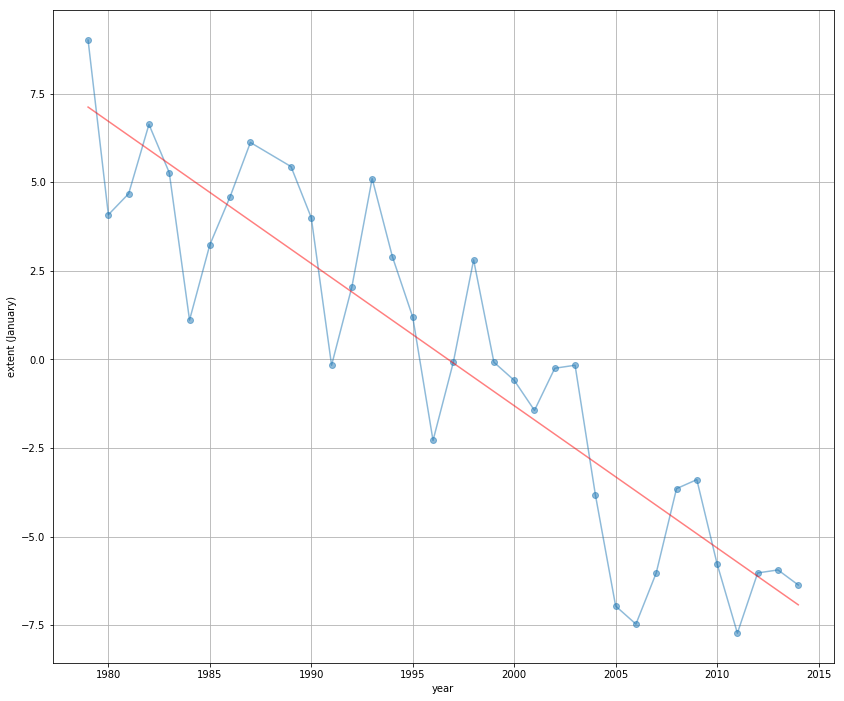

In [13]:
jan_ice = ice_cleaned[ice_cleaned.mo == 1]
X_jan = jan_ice[['year']]
y_jan = jan_ice[['n_extent']]

model_jan = linear_model.LinearRegression()
model_jan.fit(X_jan, y_jan)
y_jan_pred = model_jan.predict(X_jan)

fig = plt.figure(figsize=(14,12))
plt.plot(X_jan, y_jan,'-o', alpha = 0.5)
plt.plot(X_jan, y_jan_pred, 'r', alpha = 0.5)
plt.xlabel('year')
plt.ylabel('extent (January)')
plt.grid(True)

In [14]:
pd.DataFrame(data={'coef': model_jan.coef_[0], 'mean squared error': mean_squared_error(y_jan, y_jan_pred), 
                   'r-squared': r2_score(y_jan, y_jan_pred)}, index=['Results'])

coef  mean squared error  r-squared
Results -0.401339            3.839516   0.820387

<h2>You Try!</h2>
<p style="font-size: 16px">Now you try and fit the model using area!<br><br> <i>As an extra challenge, try and use the formulas above to calculate the r-squared value and check your work with the sklearn method.</i></p>

In [15]:
# Type your code here

<h2>What is Multi-linear Regression?</h2>
<p style="font-size: 16px">The above equation only uses one feature to predict the output, but it is possible to use several features as predictors. This would result in several coefficients. 

$$Y_i = a_0 + a_1x_1+a_2x_2+a_3x_3+...+a_nx_n+\epsilon_i$$ 

<br><p style="font-size: 16px">The coefficients in this scenario mean that for every 1 increase in $X_n$, the target variable increases by $\beta_n$ <b>holding all other variables constant.</b> The method of fitting the model is the same as before however.</p>

<h2>What is Polynomial Regression?</h2>
<p style="font-size: 16px">A polynomial regression model models the relationship between the response and the variables as an p-th order polynomial.

Igual, Laura. Introduction to Data Science: A Python Approach to Concepts, Techniques and Applications (Undergraduate Topics in Computer Science) (Kindle Location 2075). Springer International Publishing. Kindle Edition. 
$$Y_i = a_0 + a_1\phi(x_1)+a_2\phi(x_2)+a_3\phi(x_3)+...+a_n\phi(x_n)+\epsilon_i$$ <p style='font-size: 16px'>where $\phi(\bullet)$ are non-linear transformations of $x$

<p style="font-size: 16px">Lets read some data in!</p>

<h2>Case 2: Housing Data</h2>
<p style="font-size: 16px">For this example we will use a dataset provided by sklearn. There are seven toy datasets available to use for various types of modeling listed and described <a href="http://scikit-learn.org/stable/datasets/index.html">here</a>. The dataset we will be using is about the boston housing market and is stored in a dictionary object with the keys 'data' and 'target' with each containing arrays of values 13 dimensions. The task is to find a predictive model for median value of owner-occupied homes (MEDV) based on the 12 predictor variables. 
<p style="font-size: 16px">Data Set Characteristics</p>
<table style="font-size: 16px">
    <tr>
        <td>Number of Instances</td>
        <td>506</td>
    </tr>
    <tr>
        <td>Number of attributes</td>
        <td>13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.</td>
    </tr>
    <tr>
        <td>Attribute Information (in order)</td>
        <td>
            <li>CRIM : per capita crime rate by town</li>
            <li>ZN : Proportion of residential land zoned for lots over 25,000 sq.ft</li>
            <li>INDUS : proportion of non-retail business acres per town</li>
            <li>CHAS : Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)</li>
            <li>NOX : nitric oxides concentration (parts per 10 million)</li>
            <li>RM : average number of rooms per dwelling</li>
            <li>AGE : proportion of owner-occupied units built prior to 1940</li>
            <li>DIS : weighted distances to five Boston employment centres</li>
            <li>RAD : index of accessibility to radial highways</li>
            <li>TAX : full-value property-tax rate per 10,000 dollars</li>
            <li>PTRATIO : pupil-teacher ratio by town</li>
            <li>B : 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town</li>
            <li>LSTAT : % lower status of the population</li>
            <li>MEDV : Median value of owner-occupied homes in 1000 dolllars</li>
        </td>
    </tr>
    <tr>
        <td>Missing Attribute Values</td>
        <td>None</td>
    </tr>
    <tr>
        <td>Creator</td>
        <td>Harrison, D. and Rubinfeld, D.L.</td>
    </tr>
</table>
<p style="font-size: 16px"> For more information visit the sklearn <a href='https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/datasets/descr/boston_house_prices.rst'>github documentation</a></p>

In [16]:
from sklearn import datasets
boston  = datasets.load_boston()
print('One row of predictor variables: {}'.format(boston.data[0]))
print('One row of response variable: {}'.format(boston.target[0]))

One row of predictor variables: [6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
 4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00]
One row of response variable: 24.0


<p style="font-size: 16px">Although this format is difficult to visualize, it is the ideal format for input into sklearn fit functions. To help visualize the data, we can reformat it and read it into a pandas dataframe. The method <a href='https://docs.scipy.org/doc/numpy/reference/generated/numpy.c_.html'>'np.c_'</a> is called from the numpy library to concatenate the arrays on the secondary axis and input the result as the data into the pandas dataframe. We pass the columns privided to us by sklearn with the additional target variable name. The target variable in this scenario is the MEDV (median value of owner-occupied homes in 1000 dollars).

In [17]:
df_boston = pd.DataFrame(data=boston.data, columns=boston.feature_names)
df_boston['PRICE'] = boston.target
df_boston.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

<p style="font-size: 16px">We will now use pandas to describe our dataset.

In [18]:
df_boston.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.593761   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.596783   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.647423   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT       PRICE  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

<p style="font-size: 16px">We can also use pandas for visualizations. Some examples of these can be found in <a href='https://pandas.pydata.org/pandas-docs/stable/visualization.html'>pandas visualization documentation.</a> Below we use this method to create box plots for our variables, including the target. Through this visualization we can see which continuous variables are skewed or normal. This may prove useful for determining which continuous variables need transformations such as a log transformation.</p>
<p style="font-size: 16px"><i>Note: Ensure you have the pandas version 0.23 for pandas.plotting to work properly.<i> </p>

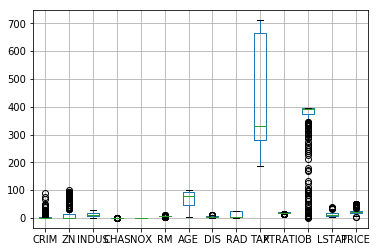

In [19]:
plot_ = df_boston.plot.box(grid=True)

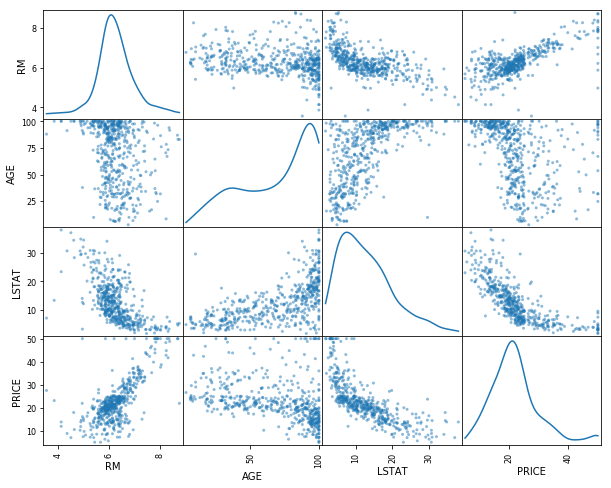

In [20]:
from pandas.plotting import scatter_matrix
scatter_  = scatter_matrix(df_boston[['RM', 'AGE', 'LSTAT', 'PRICE']], diagonal='kde', figsize=(10, 8))

<p style="font-size: 16px">Above is a scatter plot matrix, visualizing the relationship between all the variables. The strength of the relationship between two variables, or correlation, can be interpreted by the individual scatter plots. The more linear the points, the stronger the relationship. This is helpful for gauging potential issues with multicollinearity. Multicollinearity is when two predictor variables are highly correlated, resulting in erratically changing coefficiants to small changes in data.<br><br>Next we can look at the actual correlation values between the variables using pandas:</p>

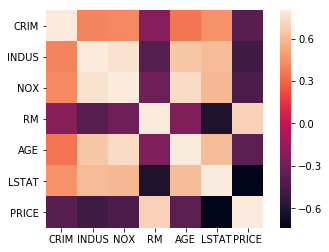

In [22]:
import seaborn as sns
df_boston_corr = df_boston[['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'LSTAT', 'PRICE']].corr(method='pearson')
plot_ = sns.heatmap(df_boston_corr, vmax = .8, square = True)

<p style="font-size: 16px">From the above table, we see that LSTAT (percent lower status of the population) has the strongest relationship with proce. We also see that LSTAT and RAD (average number of rooms per dwelling) are highly correlated with eachother.</p> 
<p style="font-size: 16px">Now let's use seaborn to visualize linear relationships between the variables</p>

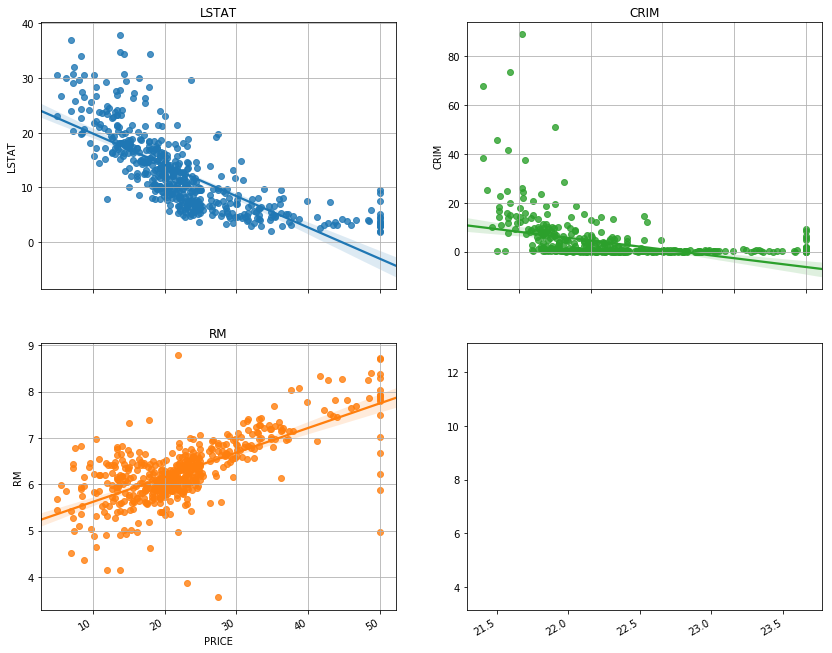

In [23]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(14,12))
sns.regplot(x=df_boston['PRICE'], y=df_boston['LSTAT'], ax=ax1);
sns.regplot(x=df_boston['PRICE'], y=df_boston['RM'], ax=ax3)
sns.regplot(x=df_boston['PRICE'], y=df_boston['CRIM'], ax=ax2)
fig.autofmt_xdate()
ax1.set_title('LSTAT')
ax1.grid(True)
ax2.set_title('CRIM')
ax2.grid(True)
ax3.set_title('RM')
ax3.grid(True)

<p style="font-size: 16px">In the plot for LSTAT, it can be seen that the relationship is non-linear, indicating we should evaluate higher order terms to improve the fit of the model. An example of an order two would be $y_i\approx a_0+a_1\mathbf{x_i}+a_2\mathbf{x_i^2}$.</p> 

In [24]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14,12))
sns.regplot(x=df_boston['PRICE'], y=df_boston['LSTAT'], order=2, ax=ax1);
sns.regplot(x=df_boston['PRICE'], y=df_boston['LSTAT'], order=3, ax=ax2)
fig.autofmt_xdate()
ax1.set_title('LSTAT Order 2')
ax1.grid(True)
ax2.set_title('LSTAT Order 3')
ax2.grid(True)

<p style="font-size: 16px">As can be seen, the relationship is non-linear and can better be represented using higher order terms.</p>

<h2>Fitting the Model</h2>

In [25]:
from sklearn import datasets
from sklearn import linear_model as lm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X = boston.data
y = boston.target

# Split the data into training/testing sets
train_size = int(boston.data.shape[0]/2)
X_train = boston.data[:train_size]
X_test = boston.data[train_size:]
y_train = boston.target[:train_size]
y_test = boston.target[train_size:]

# If you want to randomize your selection, try the function below in the future:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1)  

# Create linear regression object
linear_model = lm.LinearRegression()

# Train the model using the training sets
linear_model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred_train = linear_model.predict(X_train)
y_pred_test = linear_model.predict(X_test)


coefficients = dict()
for idx, col in enumerate(df_boston.columns[:-1]):
    coefficients[col] = linear_model.coef_[idx]
pd.DataFrame(data=coefficients, index=['Coeff'])

AGE         B      CHAS      CRIM       DIS     INDUS     LSTAT  \
Coeff -0.048504  0.017771  0.425487  1.201333 -1.119809  0.009995 -0.114801   

            NOX   PTRATIO       RAD        RM       TAX        ZN  
Coeff -8.442723 -0.659748  0.203776  8.877672 -0.015977  0.024497

In [26]:
linear_r2 = r2_score(y_test, y_pred_test)
pd.DataFrame(data={'train':{'mean squared error': mean_squared_error(y_train, y_pred_train),
                         'r-squared': r2_score(y_train, y_pred_train)},
                        'test':{'mean squared error': mean_squared_error(y_test, y_pred_test),
                         'r-squared': linear_r2}})

test     train
mean squared error  302.640911  9.987517
r-squared            -2.244202  0.855783

<p style="font-size: 16px">We can see that all the coefficients obtained are different from zero, meaning that no variable is discarded. Next, we try to build a sparse model to predict the price using the most important factors and discarding the non-informative ones. To do this, we can create a LASSO regressor, forcing zero coefficients.</p>

<h2>What is a Sparse Model?</h2>
<p style="font-size: 16px">Sparse models, i.e. <i>Lasso</i> (least absolute shrinkage and selection operator) model, use a penalty factor to remove uninformative variables by setting them to 0. Given $(\mathbf{X},\mathbf{y})$, the objective of the sparse model is to minimize: </p>
$$\frac{1}{2n}\Vert \mathbf{X}\mathbf{w}-\mathbf{y}\Vert_2^2 + a\Vert\mathbf{w}\Vert_1$$
<p style="font-size: 16px">where $\Vert\mathbf{w}\Vert_1$ is the <i>L1-norm</i> of the parameter vector $\mathbf{w}=(a_0,...,a_d)$
<p style='font-size: 16px'>We will use sklearn's linear model Lasso to fit a sparse model. For more documentation on Lasso <a href='http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html'>click here</a>.</p>

In [27]:
lasso_model = lm.Lasso(alpha=.3)
lasso_model.fit(X_train, y_train) 

y_pred_train = lasso_model.predict(X_train)
y_pred_test = lasso_model.predict(X_test)
lasso_r2 = r2_score(y_test, y_pred_test)
print("The r-squared improved by {}".format(lasso_r2 - linear_r2))
pd.DataFrame(data={'train':{'mean squared error': mean_squared_error(y_train, y_pred_train),
                         'r-squared': r2_score(y_train, y_pred_train)},
                        'test':{'mean squared error': mean_squared_error(y_test, y_pred_test),
                         'r-squared': r2_score(y_test, y_pred_test)}})

The r-squared improved by 2.74532955576


test      train
mean squared error  46.538168  10.734311
r-squared            0.501128   0.844999

In [28]:
coefficients = dict()
for idx, col in enumerate(df_boston.columns[:-1]):
    coefficients[col] = lasso_model.coef_[idx]
pd.DataFrame(data=coefficients, index=['Coeff'])

AGE         B  CHAS  CRIM       DIS  INDUS     LSTAT  NOX  \
Coeff -0.034448  0.015474   0.0   0.0 -0.793806   -0.0 -0.221818 -0.0   

        PTRATIO       RAD        RM       TAX        ZN  
Coeff -0.667685  0.073516  7.698947 -0.014342  0.019965

<h2>Evaluating Predictor Variables</h2>
<p style="font-size: 16px">From the coefficients you see that some of the variables were penalized and found not meaningful. We see that removing this variables improved our r-squared score compared to the linear regression model. </p>

In [29]:
import operator
indexes_kept = list()
indexes_rm = list()
for col, coef in coefficients.items():
    if coef > 0 or coef < 0:
        indexes_kept.append(col)
    else:
        indexes_rm.append(col)
print('Non important variable:', indexes_rm)

# Remember we stored our coefficients in a dictionary, using the operator package, we can get the key of the max value in the dict
print('Most important variable:', max(coefficients.items(), key=operator.itemgetter(1))[0])

('Non important variable:', ['CRIM', 'CHAS', 'NOX', 'INDUS'])
('Most important variable:', 'RM')


In [30]:
print("Coefficients from least effective to most:", sorted(coefficients.items(), key=lambda kv: np.abs(kv[1])))

NameError: global name 'np' is not defined

<p style="font-size: 16px">With sklearn, there are packages that help us pick the best variables to train on.</p>

In [31]:
import sklearn.feature_selection as fs 
selector = fs.SelectKBest(score_func = fs.f_regression, k = 5)
selector.fit_transform(X_train, y_train)

selector_ = dict()
for supp, col in zip(selector.get_support(), boston.feature_names):
    selector_[col] = supp
pd.DataFrame(selector_, index=['Results'])

AGE      B   CHAS   CRIM    DIS  INDUS  LSTAT    NOX  PTRATIO  \
Results  True  False  False  False  False   True   True  False     True   

           RAD    RM    TAX     ZN  
Results  False  True  False  False

In [32]:
print("Variables Kept:", [col for col, val in selector_.items() if val == True])

('Variables Kept:', ['LSTAT', 'AGE', 'RM', 'INDUS', 'PTRATIO'])


<p style="font-size: 16px">The results indicate the above variables should be kept, showing slightly different results due to a change in criterion.</p>

Text(0,0.5,'Predicted price ($1000s)')

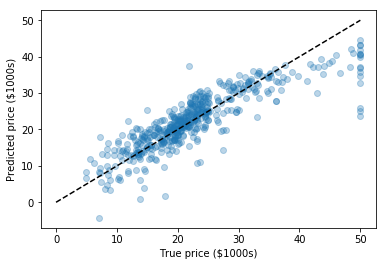

In [35]:
# Visualization of target and predicted responses
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(boston.data, boston.target)
predicted = clf.predict(boston.data)
plt.scatter(boston.target, predicted, alpha = 0.3)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')

<h2>Evaluating Predictions</h2>
<p style="font-size: 16px">The best way to visualize the accuracy of the predictions is by plotting the actual values against the predicted values and observe the residuals.</p>

In [38]:
from sklearn.linear_model import LinearRegression

predicted = clf.predict(boston.data)
plt.figure(figsize=(10, 8))
plt.scatter(boston.target, predicted, alpha = 0.3)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plot_ = plt.ylabel('Predicted price ($1000s)')

<p style="font-size: 16px">The model appears to be a good fit except for more expensive housing, indicating further analysis may be required. </p>